<a href="https://colab.research.google.com/github/Nadiiiiiine/Intrusion-Detection-Data-Analysis-with-ConvNets-on-NSL-KDD/blob/main/TP_NSL_KDD_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  TP (PARTIE 1) : NSL-KDD dataset classification with deep convNet & LSTM 

Objective: 
* preprocecing data 
* fetting model for both multilabled data and binary data 
* deep learning with multiclass 
* deep learning with binary 
*  using several metrics for predection ( confusion matrix , ROC CURVE)
* model improuval with lstm



# Drive & lib mounting

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from keras.utils import to_categorical
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import (precision_score, recall_score,
                             f1_score, accuracy_score,mean_squared_error,mean_absolute_error)

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, SimpleRNN , GRU , Activation
from keras.layers.normalization import BatchNormalization
from keras import optimizers
import tensorflow as tf
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D , AveragePooling1D
from tensorflow.keras.models import  load_model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

"""
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/TP_bdh""" #raouf

"""
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Colab Notebooks/TP_bdh
#nadine"""

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Colab Notebooks/TP_bdh




 # Data extraction




In [3]:
#train+, test+  dataset loading

# par drive 
#train='KDDTrain+.txt'  
#test='KDDTest+.txt'

# par github
test='https://raw.githubusercontent.com/Nadiiiiiine/TP_Bdh/main/KDDTest%2B.txt'   
train='https://raw.githubusercontent.com/Nadiiiiiine/TP_Bdh/main/KDDTrain%2B.txt'

featureV=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count", 
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

flagV=['OTH','RSTOS0','SF','SH','RSTO','S2','S1','REJ','S3','RSTR','S0']

protocol_typeV=['tcp','udp','icmp']

serviceV=['http','smtp','finger','domain_u','auth','telnet','ftp','eco_i','ntp_u','ecr_i','other','private','pop_3','ftp_data',
                  'rje','time','mtp','link','remote_job','gopher','ssh','name','whois','domain','login','imap4','daytime','ctf','nntp',
                  'shell','IRC','nnsp','http_443','exec','printer','efs','courier','uucp','klogin','kshell','echo','discard','systat',
                  'supdup','iso_tsap','hostnames','csnet_ns','pop_2','sunrpc','uucp_path','netbios_ns','netbios_ssn','netbios_dgm',
                  'sql_net','vmnet','bgp','Z39_50','ldap','netstat','urh_i','X11','urp_i','pm_dump','tftp_u','tim_i','red_i','icmp',
                  'http_2784','harvest','aol','http_8001']

binary_attack=['normal','ipsweep', 'nmap', 'portsweep','satan', 'saint', 'mscan','back', 'land', 'neptune', 'pod', 'smurf',
               'teardrop', 'apache2', 'udpstorm', 'processtable','mailbomb','buffer_overflow', 'loadmodule', 'perl', 'rootkit',
               'xterm', 'ps', 'sqlattack','ftp_write', 'guess_passwd', 'imap', 'multihop','phf', 'spy', 'warezclient',
               'warezmaster','snmpgetattack','named', 'xlock', 'xsnoop','sendmail', 'httptunnel', 'worm', 'snmpguess']

multiclass_attack={ 'normal': 'normal',
        'probe': ['ipsweep.', 'nmap.', 'portsweep.','satan.', 'saint.', 'mscan.'],
        'dos': ['back.', 'land.', 'neptune.', 'pod.', 'smurf.','teardrop.', 'apache2.', 'udpstorm.', 'processtable.','mailbomb.'],
        'u2r': ['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.','xterm.', 'ps.', 'sqlattack.'],
        'r2l': ['ftp_write.', 'guess_passwd.', 'imap.', 'multihop.','phf.', 'spy.', 'warezclient.', 'warezmaster.','snmpgetattack.',
                   'named.', 'xlock.', 'xsnoop.','sendmail.', 'httptunnel.', 'worm.', 'snmpguess.']}                   

In [ ]:
train_data=pd.read_csv(train,names=featureV)
test_data=pd.read_csv(test,names=featureV)

In [ ]:
train_data = train_data.query("service != 'aol'")
train_data = train_data.query("service != 'harvest'")
train_data = train_data.query("service != 'http_2784'")
train_data = train_data.query("service != 'http_8001'")
train_data = train_data.query("service != 'red_i'")
train_data = train_data.query("service != 'urh_i'")
train_data = train_data.query("service != 'printer'")
train_data = train_data.query("service != 'rje'")


#-------------------------------------------------------------------------------->>>>

test_data = test_data.query("service != 'printer'")
test_data = test_data.query("service != 'rje'")

# visualization




In [ ]:
def bar_graph(feature):
    train_data[feature].value_counts().plot(kind="bar")

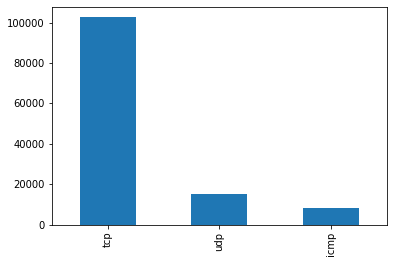

In [ ]:
bar_graph('protocol_type')

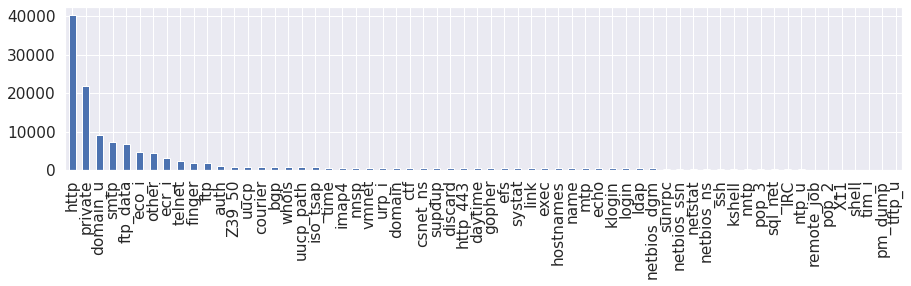

In [ ]:
plt.figure(figsize=(15,3))
bar_graph('service')

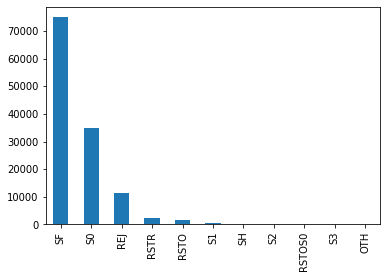

In [ ]:
bar_graph('flag')

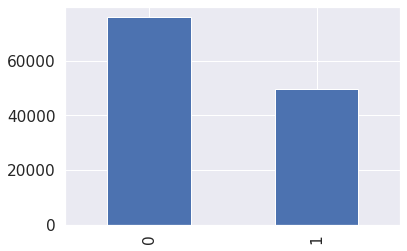

In [ ]:
bar_graph('logged_in')

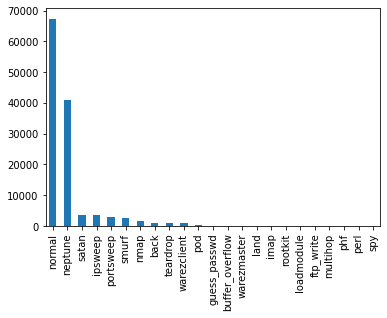

In [ ]:
bar_graph('label')

#Preprocessing 

In [ ]:
def preprocessing(data,cls,df):
  
#----------attack categorization----------------->
  data['label']=data['label'].replace(['normal.','normal'],0)

#----------------------binary classification--------------------->
  if cls=='binary':
    for i in range(len(binary_attack)):
      data['label'] = data['label'].replace(binary_attack[i], 1)
  
#---------------multiclass classification-------------------->  
  elif cls=='multiclass':
    for i in range(len(multiclass_attack['probe'])):
      data['label']=data['label'].replace([multiclass_attack['probe'][i],multiclass_attack['probe'][i][:-1]],1)
    
    for i in range(len(multiclass_attack['dos'])):
      data['label']=data['label'].replace([multiclass_attack['dos'][i],multiclass_attack['dos'][i][:-1]],2)
    
    for i in range(len(multiclass_attack['u2r'])):
      data['label']=data['label'].replace([multiclass_attack['u2r'][i],multiclass_attack['u2r'][i][:-1]],3)
    
    for i in range(len(multiclass_attack['r2l'])):
      data['label'] = data['label'].replace([multiclass_attack['r2l'][i],multiclass_attack['r2l'][i][:-1]],4)

#-------------------------splitting features and labels---------------->
  y=data['label']
  x=data.loc[:,'duration':'hot']

#-----------------converting to binary feature vectors-------------------------------------->  

'''
pd.get_dummies is a method that allows us to do a quick one hot encoding on our columns. 
This takes every value it finds in a single column and makes an individual column for each value, 
with a 0 or 1 indicating whether that column is 'hot'.
'''
  t=x.protocol_type.copy()
  t=pd.get_dummies(t)
  x=x.drop(columns='protocol_type',axis=1)
  x=x.join(t)

  t1=x.service.copy()
  t1=pd.get_dummies(t1)
  x=x.drop(columns='service',axis=1)
  x=x.join(t1)

  t2=x.flag.copy()
  t2=pd.get_dummies(t2)
  x=x.drop(columns='flag',axis=1)
  x=x.join(t2)
#------------------------------------------------------------------------------>

#-----------------converting to binary label vectors--------------------------------------> 
  yt=y.copy()
  yt=pd.get_dummies(yt)
#------------------------------------------------------------------------------>

  x = MinMaxScaler(feature_range=(0, 1)).fit_transform(x)
  if df=='train':
    return x,yt
  else:
    return x,y  

#**Multi Classification**

In [ ]:
x_train,Y_train=preprocessing(train_data,cls='multiclass',df='train')
x_test,Y_test=preprocessing(test_data,cls='multiclass',df='test')
print("shape of : - x_train {} Y_train {} \nx_test {} Y_test {}" .format(np.shape(x_train), np.shape(Y_train),np.shape(x_test), np.shape(Y_test))  )

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print("shape after : - x_train {} Y_train {} \nx_test {} Y_test {}" .format(np.shape(x_train), np.shape(Y_train),np.shape(x_test), np.shape(Y_test))  )


shape of : - x_train (125793, 83) Y_train (125793, 5) 
x_test (22525, 83) Y_test (22525,)
shape after : - x_train (125793, 83, 1) Y_train (125793, 5) 
x_test (22525, 83, 1) Y_test (22525,)



## Model

In [ ]:
model = Sequential()

model.add(Convolution1D(32, 3, padding="same",activation="relu",input_shape = (x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Dropout(0.5))

model.add(Convolution1D(64, 3, padding="same",activation="relu"))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(5, activation="softmax"))

In [ ]:
#List summary 
model.summary()


In [ ]:
#plot model
tf.keras.utils.plot_model(model, 'my_first_model.png', show_shapes=True)

In [ ]:
model.compile(optimizer ='adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

history=model.fit(x_train, Y_train, epochs = 100, batch_size = 128)

Epoch 1/100
983/983 [==============================] - 10s 3ms/step - loss: 0.4037 - accuracy: 0.8662
Epoch 2/100
983/983 [==============================] - 3s 3ms/step - loss: 0.2145 - accuracy: 0.9289
Epoch 3/100
983/983 [==============================] - 3s 3ms/step - loss: 0.2004 - accuracy: 0.9317
Epoch 4/100
983/983 [==============================] - 3s 3ms/step - loss: 0.1941 - accuracy: 0.9341
Epoch 5/100
983/983 [==============================] - 3s 3ms/step - loss: 0.1932 - accuracy: 0.9346
Epoch 6/100
983/983 [==============================] - 3s 3ms/step - loss: 0.1844 - accuracy: 0.9345
Epoch 7/100
983/983 [==============================] - 3s 3ms/step - loss: 0.1731 - accuracy: 0.9360
Epoch 8/100
983/983 [==============================] - 3s 3ms/step - loss: 0.1680 - accuracy: 0.9358
Epoch 9/100
983/983 [==============================] - 3s 3ms/step - loss: 0.1652 - accuracy: 0.9375
Epoch 10/100
983/983 [==============================] - 3s 3ms/step - loss: 0.1620 - accur

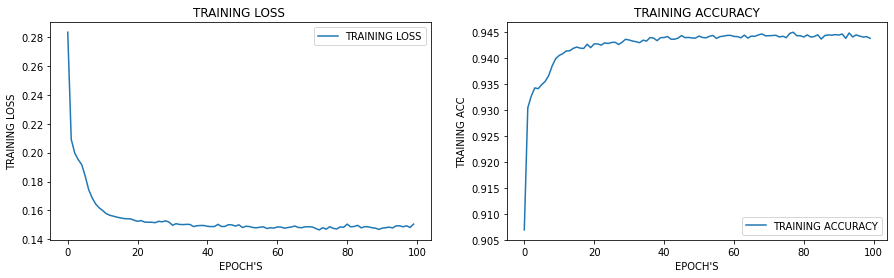

In [ ]:

#use matplitlib to draw the plots
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = "TRAINING LOSS")
plt.title("TRAINING LOSS ")
plt.xlabel("EPOCH'S")
plt.ylabel("TRAINING LOSS")
plt.legend(loc = "best")

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label = "TRAINING ACCURACY")
plt.title("TRAINING ACCURACY")
plt.xlabel("EPOCH'S")
plt.ylabel("TRAINING ACC")
plt.legend(loc = "best")
plt.show()

In [ ]:
# saving to and loading from file
saved_model = f"TPCNN_model.h5"
print(f"Save model to file {saved_model} ... ", end="")
model.save(saved_model)
print("OK")

In [ ]:
#model already saved in file

saved_model= load_model("TPCNN_model.h5",custom_objects=None
                          )
print("OK")

## **Evaluation of the model**

In [ ]:
pred = model.predict(x_test)
y_pred= np.argmax(pred, axis = 1)

In [ ]:
accuracy =accuracy_score(Y_test, y_pred)*100
print(accuracy)

71.76914539400666


##**Confusion matrix**

[[8710  873  126    1    1]
 [ 226 1045 1135    0   15]
 [1039    6 6394    0    0]
 [  51    0    0   16    0]
 [1492 1359   34    1    1]]


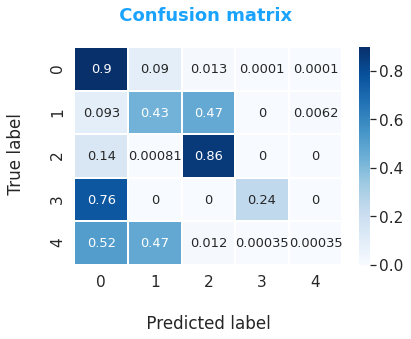

In [ ]:
cm=confusion_matrix(Y_test, y_pred)
print(cm)

class_names =['noremal','probe','dos','u2r','r2l']

Ndecimals = 3
decade = 10**Ndecimals
cm=np.trunc(cm*decade)/decade
#print(cm)
cm_norm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#print(cm_norm)

df_cm = pd.DataFrame(cm_norm, range(5),
                  range(5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 13}, cmap=plt.cm.Blues, linewidths=1)# font size
plt.title(' Confusion matrix  \n', fontweight='bold', color =(0, 0.6, 1, 0.9), fontsize='18', horizontalalignment='center')
plt.ylabel(' True label\n ')
plt.xlabel('\n Predicted label ')
plt.show()

# **Binary Classification**

In [ ]:

x_train1,Y_train1=preprocessing(train_data,cls='binary',df='train')
x_test1,Y_test1=preprocessing(test_data,cls='binary',df='test')

print("shape of : - x_train {} Y_train {} \nx_test {} Y_test {}" .format(np.shape(x_train1), np.shape(Y_train),np.shape(x_test1), np.shape(Y_test1))  )

x_train1 = np.reshape(x_train1, (x_train1.shape[0], x_train1.shape[1], 1))
x_test1 = np.reshape(x_test1, (x_test1.shape[0], x_test1.shape[1], 1))
print("shape after : - x_train {} Y_train {} \nx_test {} Y_test {}" .format(np.shape(x_train1), np.shape(Y_train1),np.shape(x_test1), np.shape(Y_test1))  )


shape of : - x_train (125793, 83) Y_train (125793, 5) 
x_test (22525, 83) Y_test (22525,)
shape after : - x_train (125793, 83, 1) Y_train (125793, 2) 
x_test (22525, 83, 1) Y_test (22525,)


In [ ]:
mode1l = Sequential()

mode1l.add(Convolution1D(32, 3, padding="same",activation="relu",input_shape = (x_train.shape[1], 1)))
mode1l.add(MaxPooling1D(pool_size=(4)))
mode1l.add(Dropout(0.5))

mode1l.add(Convolution1D(64, 3, padding="same",activation="relu"))
mode1l.add(MaxPooling1D(pool_size=(2)))
mode1l.add(Dropout(0.5))

mode1l.add(Flatten())
mode1l.add(Dense(256, activation="relu"))
mode1l.add(Dropout(0.5))
mode1l.add(Dense(2, activation="softmax"))

mode1l.compile(optimizer ='adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

history1=mode1l.fit(x_train1, Y_train1, epochs = 100, batch_size = 128)

Epoch 1/100
983/983 [==============================] - 3s 3ms/step - loss: 0.2191 - accuracy: 0.9203
Epoch 2/100
983/983 [==============================] - 3s 3ms/step - loss: 0.1510 - accuracy: 0.9518
Epoch 3/100
983/983 [==============================] - 3s 3ms/step - loss: 0.1449 - accuracy: 0.9534
Epoch 4/100
983/983 [==============================] - 3s 3ms/step - loss: 0.1381 - accuracy: 0.9554
Epoch 5/100
983/983 [==============================] - 3s 3ms/step - loss: 0.1309 - accuracy: 0.9539
Epoch 6/100
983/983 [==============================] - 3s 3ms/step - loss: 0.1246 - accuracy: 0.9544
Epoch 7/100
983/983 [==============================] - 3s 3ms/step - loss: 0.1215 - accuracy: 0.9544
Epoch 8/100
983/983 [==============================] - 3s 3ms/step - loss: 0.1203 - accuracy: 0.9552
Epoch 9/100
983/983 [==============================] - 3s 3ms/step - loss: 0.1174 - accuracy: 0.9550
Epoch 10/100
983/983 [==============================] - 3s 3ms/step - loss: 0.1181 - accura

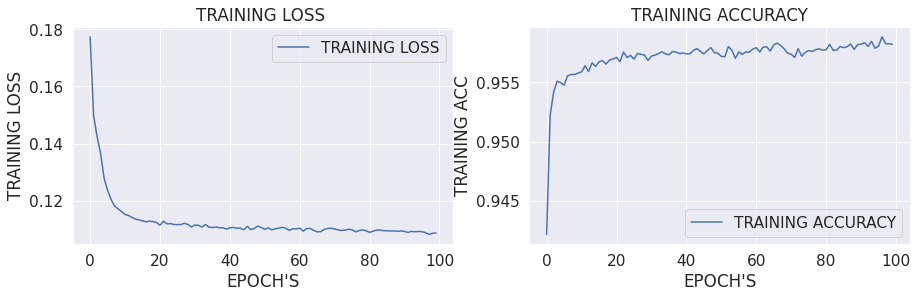

In [ ]:

#use matplitlib to draw the plots
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label = "TRAINING LOSS")
plt.title("TRAINING LOSS ")
plt.xlabel("EPOCH'S")
plt.ylabel("TRAINING LOSS")
plt.legend(loc = "best")

plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'], label = "TRAINING ACCURACY")
plt.title("TRAINING ACCURACY")
plt.xlabel("EPOCH'S")
plt.ylabel("TRAINING ACC")
plt.legend(loc = "best")
plt.show()

## **Evaluation of the model**

In [ ]:
pred1 = mode1l.predict(x_test1)
y_pred1= np.argmax(pred1, axis = 1)

accuracy1 =accuracy_score(Y_test1, y_pred1)*100
print(accuracy1)

82.85016648168701


In [ ]:
y_pred1

array([1, 1, 0, ..., 0, 0, 1])

##**Confusion matrix**

[[8725  986]
 [2877 9937]]


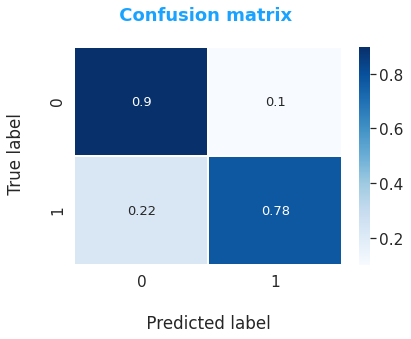

In [ ]:
cm=confusion_matrix(Y_test1, y_pred1)
print(cm)

class_names =['normal','attack']

Ndecimals = 3
decade = 10**Ndecimals
cm=np.trunc(cm*decade)/decade
#print(cm)
cm_norm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#print(cm_norm)

df_cm = pd.DataFrame(cm_norm, range(2), range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 13}, cmap=plt.cm.Blues, linewidths=1)# font size
plt.title(' Confusion matrix  \n', fontweight='bold', color =(0, 0.6, 1, 0.9), fontsize='18', horizontalalignment='center')
plt.ylabel(' True label\n ')
plt.xlabel('\n Predicted label ')
plt.show()

## **ROC Curv** 

ROC curve is a performance measurement for the classification problems at various threshold settings

The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.






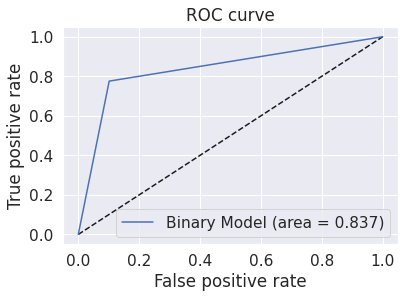

In [ ]:


y_pred_keras = mode1l.predict(x_test1)
y_pred_keras= np.argmax(y_pred_keras, axis = 1).ravel()

fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test1, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Binary Model (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()



we can sea the roc curve is near to 0,84 wich is close to this means ower model has a good measure of separability

# **LSTM +  CNN**

here we tried to improuve ower model by adding lstm (reccurent ) layer to the model and do the training and compare

In [ ]:
model2 = Sequential()

model2.add(Convolution1D(32, 3, padding="same",activation="relu",input_shape = (x_train.shape[1], 1)))
model2.add(MaxPooling1D(pool_size=(4)))
model2.add(Dropout(0.5))

model2.add(Convolution1D(64, 3, padding="same",activation="relu"))
model2.add(MaxPooling1D(pool_size=(2)))
model2.add(Dropout(0.5))

model2.add(LSTM(70))

model2.add(Flatten())
model2.add(Dense(256, activation="relu"))
model2.add(Dropout(0.5))
model2.add(Dense(5, activation="softmax"))

model2.compile(optimizer ='adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

history2=model2.fit(x_train, Y_train, epochs = 100, batch_size = 128)

Epoch 1/100
983/983 [==============================] - 6s 5ms/step - loss: 0.5615 - accuracy: 0.8194
Epoch 2/100
983/983 [==============================] - 4s 4ms/step - loss: 0.2198 - accuracy: 0.9275
Epoch 3/100
983/983 [==============================] - 5s 5ms/step - loss: 0.1931 - accuracy: 0.9347
Epoch 4/100
983/983 [==============================] - 4s 4ms/step - loss: 0.1917 - accuracy: 0.9338
Epoch 5/100
983/983 [==============================] - 5s 5ms/step - loss: 0.1853 - accuracy: 0.9363
Epoch 6/100
983/983 [==============================] - 5s 5ms/step - loss: 0.1835 - accuracy: 0.9372
Epoch 7/100
983/983 [==============================] - 5s 5ms/step - loss: 0.1803 - accuracy: 0.9382
Epoch 8/100
983/983 [==============================] - 5s 5ms/step - loss: 0.1828 - accuracy: 0.9368
Epoch 9/100
983/983 [==============================] - 4s 5ms/step - loss: 0.1769 - accuracy: 0.9387
Epoch 10/100
983/983 [==============================] - 4s 4ms/step - loss: 0.1769 - accura